In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('merged_dataframes.csv')

In [10]:
df.drop(columns=['Period']).describe()

,Unnamed: 0,All Types Volume,Beer Volume,Wine Volume,Spirits Volume,Other Volume,GDP
count,6315.000000,6315.000000,6315.000000,6315.000000,6315.000000,6315.000000,6315.000000
mean,3325.427870,4.770110,1.703393,0.936203,1.457617,0.690838,8196.817947
std,1933.544451,3.942015,1.741130,1.854165,1.638080,1.675924,14431.945243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.795345
25%,1633.500000,1.320000,0.305000,0.012000,0.110000,0.000000,648.493308
50%,3306.000000,3.980000,1.090000,0.130000,0.970000,0.010000,2203.646615
75%,4973.500000,7.510000,2.700000,0.920000,2.280000,0.390000,8018.968589
max,6671.000000,19.890000,9.960000,18.740000,13.400000,13.060000,123514.196686


Assign a score to the GDP of a country on a scale of 1-5

1 - very low

2 - low

3 - ok

4 - good

5 - very good

In [3]:
max_val = df['GDP'].max()
split = max_val / 5

In [4]:
score = []

for x in df['GDP']:
    if x < split:
        score.append(1)
    elif split < x < 2*split:
        score.append(2)
    elif 2*split < x < 3*split:
        score.append(3)
    elif 3*split < x < 4*split:
        score.append(4)
    elif x > 4*split:
        score.append(5)

In [5]:
df['score'] = score

In [6]:
# check nothing missed (incase x = split)

len(score), len(df)

(6315, 6315)

In [20]:
df

,Unnamed: 0,Location,Period,All Types Volume,Beer Volume,Wine Volume,Spirits Volume,Other Volume,GDP,score
0,0,Afghanistan,1961,0.00,0.00,0.00,0.00,0.00,59.860900,1
1,1,Afghanistan,1962,0.00,0.00,0.00,0.00,0.00,58.458009,1
2,2,Afghanistan,1963,0.00,0.00,0.00,0.00,0.00,78.706429,1
3,3,Afghanistan,1964,0.00,0.00,0.00,0.00,0.00,82.095307,1
4,4,Afghanistan,1965,0.00,0.00,0.00,0.00,0.00,101.108325,1
...,...,...,...,...,...,...,...,...,...,...
6310,6667,Zimbabwe,2015,3.84,1.93,0.06,0.36,1.49,1445.069702,1
6311,6668,Zimbabwe,2016,3.76,1.93,0.05,0.35,1.44,1464.588957,1
6312,6669,Zimbabwe,2017,3.82,1.93,0.05,0.39,1.45,1235.189032,1
6313,6670,Zimbabwe,2018,3.10,1.20,0.04,0.39,1.47,1254.642265,1


<AxesSubplot:>

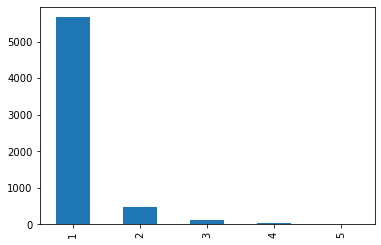

In [42]:
df['score'].value_counts().plot(kind='bar')

In [17]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from scipy.stats import randint
from sklearn.preprocessing import StandardScaler



# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
X = df.drop(columns=['GDP', 'score', 'Unnamed: 0', 'Location', 'Period'])
y = df['score']

In [26]:
X

,All Types Volume,Beer Volume,Wine Volume,Spirits Volume,Other Volume
0,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...
6310,3.84,1.93,0.06,0.36,1.49
6311,3.76,1.93,0.05,0.35,1.44
6312,3.82,1.93,0.05,0.39,1.45
6313,3.10,1.20,0.04,0.39,1.47


In [27]:
# normalise

df_max_scaled = X.copy()
  
for column in df_max_scaled.columns:
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
      
X_norm = df_max_scaled
X_norm

,All Types Volume,Beer Volume,Wine Volume,Spirits Volume,Other Volume
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
6310,0.193062,0.193775,0.003202,0.026866,0.114089
6311,0.189040,0.193775,0.002668,0.026119,0.110260
6312,0.192056,0.193775,0.002668,0.029104,0.111026
6313,0.155857,0.120482,0.002134,0.029104,0.112557


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2)

In [29]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
y_pred = rf.predict(X_test)

In [31]:
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_train = rf.score(X_train, y_train)
print('Accuracy on Test', accuracy_test)
print('Accuracy on Train', accuracy_train)

Accuracy on Test 0.9604117181314331
Accuracy on Train 0.9970308788598575


Overfitting

In [32]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
scores = cross_val_score(rf, X, y, cv=cv)
print(scores)

[0.95566112 0.95011876 0.96991291 0.96912114 0.96199525]


In [33]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.96 accuracy with a standard deviation of 0.01


In [34]:
conf_mat = confusion_matrix(y_test, y_pred)

Text(0.5, 1.0, 'RForest Confusion Matrix')

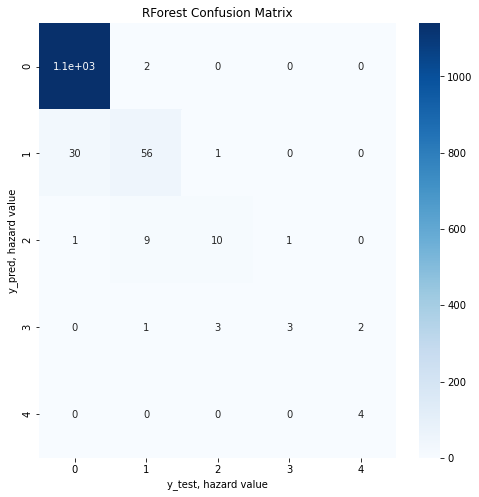

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))

ax = sns.heatmap(conf_mat, annot=True, cmap='Blues')
ax.set_xlabel('y_test, hazard value')
ax.set_ylabel('y_pred, hazard value')
ax.set_title('RForest Confusion Matrix')

<AxesSubplot:ylabel='Count'>

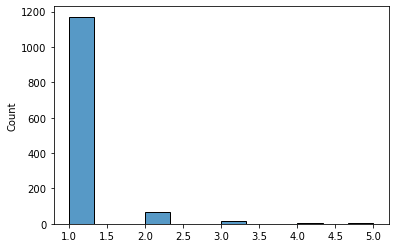

In [36]:
sns.histplot(y_pred)

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.97      1.00      0.99      1142
           2       0.82      0.64      0.72        87
           3       0.71      0.48      0.57        21
           4       0.75      0.33      0.46         9
           5       0.67      1.00      0.80         4

    accuracy                           0.96      1263
   macro avg       0.79      0.69      0.71      1263
weighted avg       0.96      0.96      0.96      1263



In [43]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2500, num = 10)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [44]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 366, 633, 900,
                                                         1166, 1433, 1700, 1966,
                                                         2233, 2500]},
                   random_state=42, verbose=2)

In [45]:
params = rf_random.best_params_
params

{'n_estimators': 1700,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': False}

In [46]:
rf1 = RandomForestClassifier(**params)

In [47]:
rf1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=50, min_samples_split=5,
                       n_estimators=1700)

In [48]:
y_pred1 = rf1.predict(X_test)

In [49]:
accuracy1 = accuracy_score(y_test, y_pred1)
print(accuracy1)

0.9619952494061758


In [50]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
scores1 = cross_val_score(rf1, X, y, cv=cv)
print(scores1)

[0.95882819 0.95249406 0.97070467 0.97149644 0.96516231]


In [51]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores1.mean(), scores1.std()))

0.96 accuracy with a standard deviation of 0.01


In [52]:
feature_imp = pd.Series(rf1.feature_importances_, index=X.columns).sort_values(ascending=True)

<AxesSubplot:>

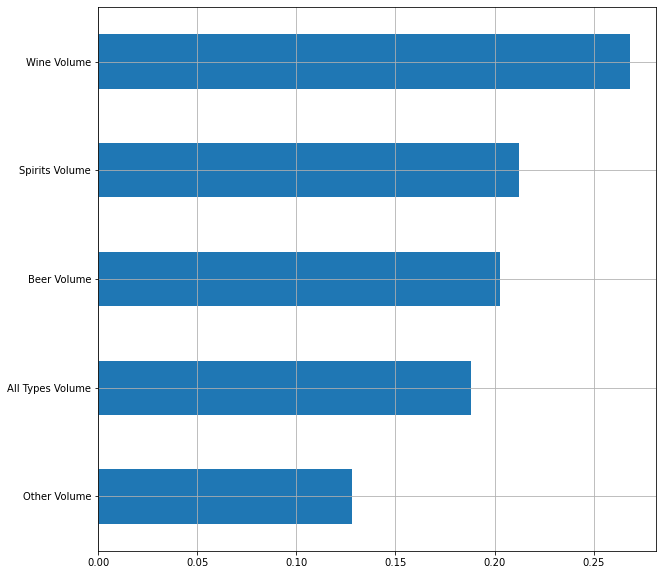

In [53]:
feature_imp.plot(kind='barh', grid=True, figsize=(10,10))

In [54]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           1       0.97      1.00      0.99      1142
           2       0.85      0.64      0.73        87
           3       0.67      0.48      0.56        21
           4       0.80      0.44      0.57         9
           5       0.67      1.00      0.80         4

    accuracy                           0.96      1263
   macro avg       0.79      0.71      0.73      1263
weighted avg       0.96      0.96      0.96      1263



Unsupervised

In [22]:
from sklearn.cluster import KMeans
from sklearn import cluster
from sklearn import metrics
from sklearn import preprocessing

In [12]:
# run this - if threadpool ctl si not v3.2.0, run next cell

# import sklearn
# sklearn.show_versions()

In [10]:
#  !pip install threadpoolctl -U

In [18]:
X = df.drop(columns=['Period', 'Unnamed: 0', 'score', 'Location'])
X = X.to_numpy()
y = df['GDP'].to_numpy()
X

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 5.98609000e+01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 5.84580087e+01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 7.87064288e+01],
       ...,
       [3.82000000e+00, 1.93000000e+00, 5.00000000e-02, 3.90000000e-01,
        1.45000000e+00, 1.23518903e+03],
       [3.10000000e+00, 1.20000000e+00, 4.00000000e-02, 3.90000000e-01,
        1.47000000e+00, 1.25464226e+03],
       [3.11000000e+00, 1.20000000e+00, 5.00000000e-02, 3.90000000e-01,
        1.47000000e+00, 1.31674066e+03]])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [24]:
kmeans = KMeans(n_clusters = 5, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=5, n_init='auto', random_state=0)

In [14]:
#Silhouette refers to a method of interpretation and validation of consistency within clusters of data
print("silhouette_score = ", metrics.silhouette_score(X, kmeans.labels_))

# #all of the data points that we have of the same class are elements of the same cluster
# print("completeness_score = ", metrics.completeness_score(Y2, model.labels_))
# # all of the clusters contain only data points, which are members of a single class
# print("homogeneity_score = ", metrics.homogeneity_score(Y2, model.labels_))

silhouette_score =  0.7092231069898723
